In [1]:
import numpy as np
import statsmodels.api as sm
import pylab as py
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### # Q-Q Plot:

In statistics, **a Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.**<br><br>A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). This defines a parametric curve where the parameter is the index of the quantile interval.


### statsmodel.api.qqplot()
**dist:** Comparison distribution. The default is **scipy.stats.distributions.norm (a standard normal)**.

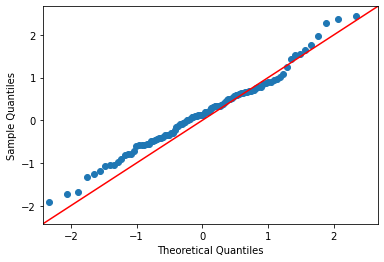

In [11]:
ds1 = np.random.normal(0, 1, 100)
# print(ds1)

sm.qqplot(ds1, line='45') # basically verifying if our ds1 is Gaussian distribution(by default) or not.
py.show()

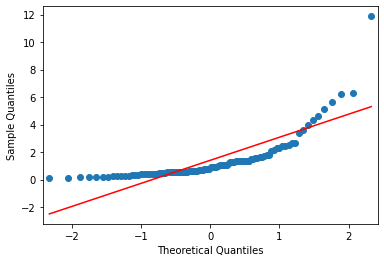

In [12]:
## Let's check with the Lognormal distribution

ds2 = np.random.lognormal(0,1,100)
# print(ds2)

sm.qqplot(ds2, line='s')
py.show()

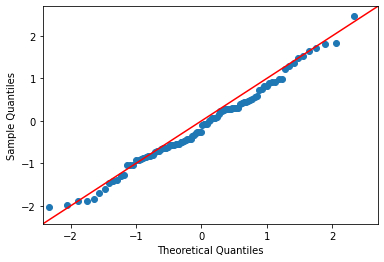

In [14]:
## Since we know log of LogNormal distibution is Gaussian distribution
# now let's check with its Log

ds2_normal = np.log(ds2)
# print(ds2_normal)

sm.qqplot(ds2_normal, line='45')
py.show()

In [17]:
### Now, lets check for somewhat Pareto distribution.
## We know that a perfect Pareto distribution can be converted to the Gaussian distribution by the Boxcox function.

import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

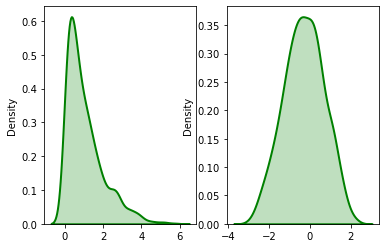

In [18]:
### generate non-normal data
ds3 = np.random.exponential(size=1000)
# print(ds3)

### transformation into Gaussian using boxcox
transformed, lambda_ = stats.boxcox(ds3)
# print(transformed, lambda_)

fig, ax = plt.subplots(1,2) # In one row, create two subplots

sns.distplot(ds3, hist=False, kde=True,
             label = 'Non-Normal', color = 'green',
             kde_kws = {'shade': True, 'linewidth': 2},
             ax=ax[0]) # not Lognormal, if it had been it'd have started from zero.

sns.distplot(transformed, hist=False, kde=True,
             label = 'Normal', color = 'green',
             kde_kws = {'shade': True, 'linewidth': 2},
             ax=ax[1])

### # Now we're gonna check if ds3 is perfect-pareto or not (although it goes w/o saying)

Since, we know that after applying **boxcox transformation** to the **pareto distribution** we get the **normal distribution**.
So, here if **ds3** is pareto then it's boxcoxed version is gonna be perfectly normal.

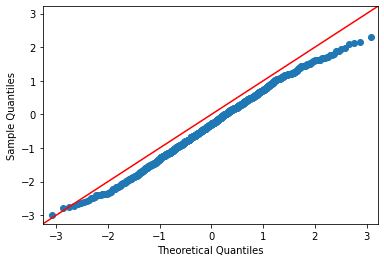

In [21]:
sm.qqplot(transformed, line='45')  
py.show()

### So our answer is clear, since it's not lying entirely on the 45 degree line, 'transformed' ain't Gaussian and thus ds3 isn't a Pareto distribution.

### # probplot():

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab

### probplot is almost like QQ plot. orobplot is more of a generalized version.
### Where qq plot kinda is only able to check for Normal distribution, probplot has somewhat more freedom.

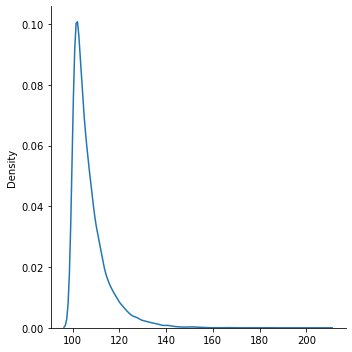

In [32]:
x_m = 10 # noise
alpha = 15
size = 10000 # no. of random samples

# generating a pareto distribution
samples = (np.random.pareto(alpha, size)+1)*100
# print(samples)

sns.displot(samples, kind='kde') # fucking Pareto

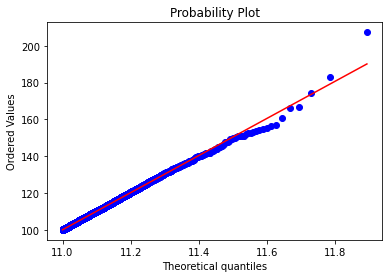

In [34]:
# stats.probplot()
stats.probplot(samples, dist='pareto', sparams=(15, 10), plot=pylab)
plt.show()

### # probplot() as qqplot():

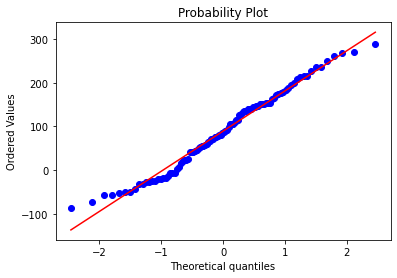

In [10]:
# generating a pareto distribution
ds_normal = (np.random.normal(0,1,100)+1)*100 # noise

# sns.displot(ds_normal, kind='kde') # fucking Normal

# stats.probplot()
stats.probplot(ds_normal, dist='norm', plot=pylab) # even by default normal
plt.show()